In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'higgs-boson/training/training.csv'
data = pd.read_csv(file_path)
data = data.dropna()

#print(data.head())
df = data.drop('EventId', axis=1)

y = df['Label']
X = df.drop('Label', axis=1)
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = StandardScaler() 

# Perform feature scaling
scaled_data = scaler.fit_transform(X)

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load your data
file_path = 'higgs-boson/training/training.csv'
data = pd.read_csv(file_path)
data = data.dropna()

# Drop the 'EventId' column
df = data.drop('EventId', axis=1)

# Separate target variable (y) and features (X)
y = df['Label']
X = df.drop('Label', axis=1)

# Choose your scaler (StandardScaler or MinMaxScaler)
scaler = StandardScaler()  # or scaler = MinMaxScaler()

# Perform feature scaling
scaled_data = scaler.fit_transform(X)

# Create a new DataFrame with scaled data and original column names
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


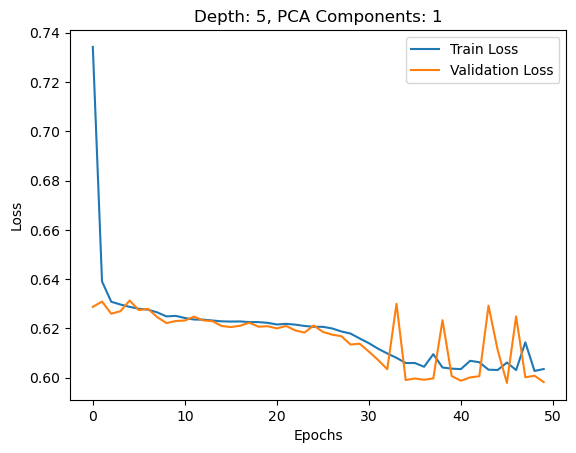

1172/1172 [==============================] - 1s 684us/step


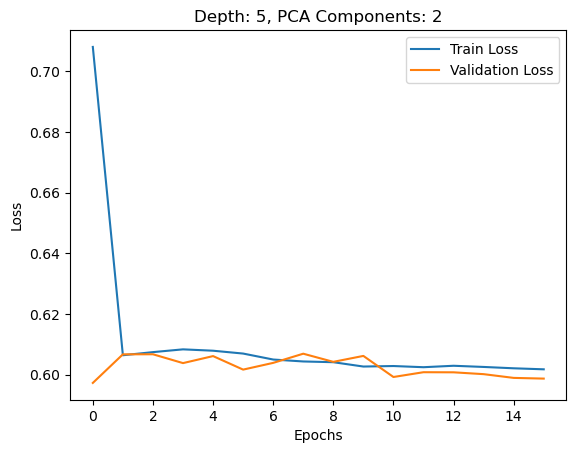

1172/1172 [==============================] - 1s 979us/step


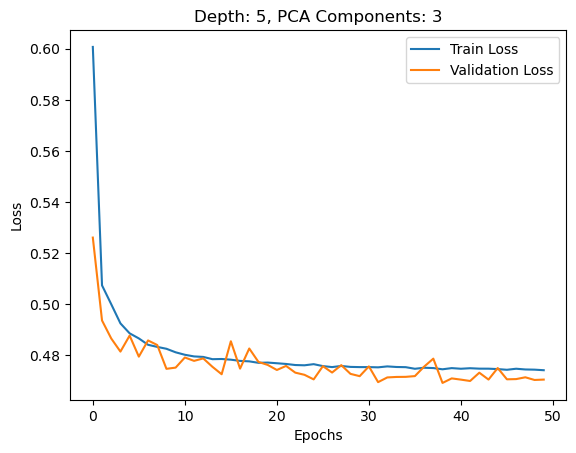

1172/1172 [==============================] - 1s 594us/step


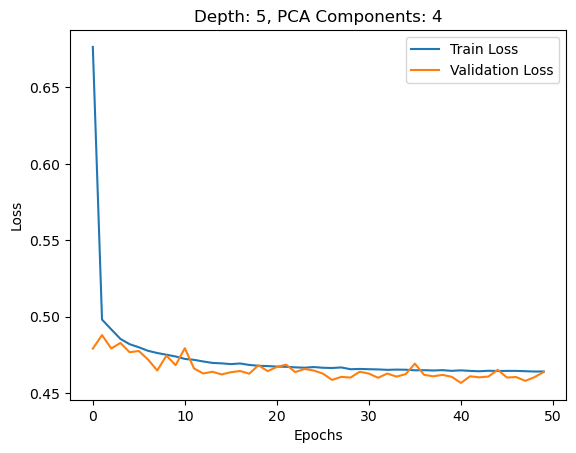

1172/1172 [==============================] - 1s 1ms/step


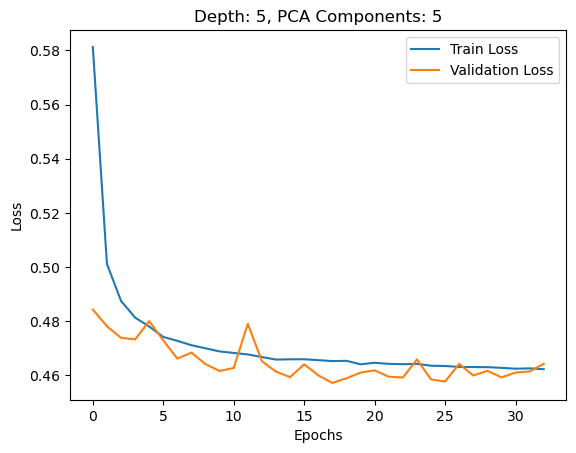

1172/1172 [==============================] - 1s 950us/step


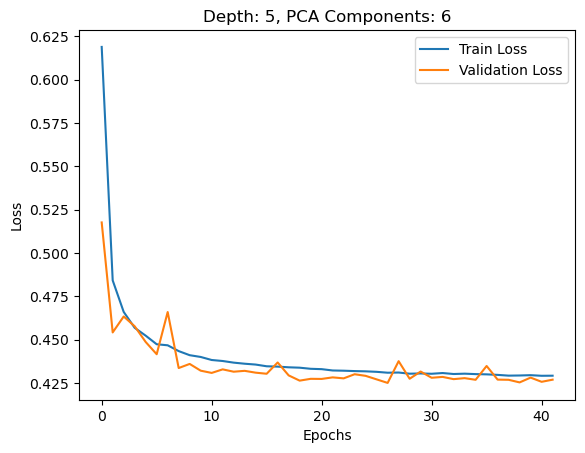

1172/1172 [==============================] - 1s 701us/step


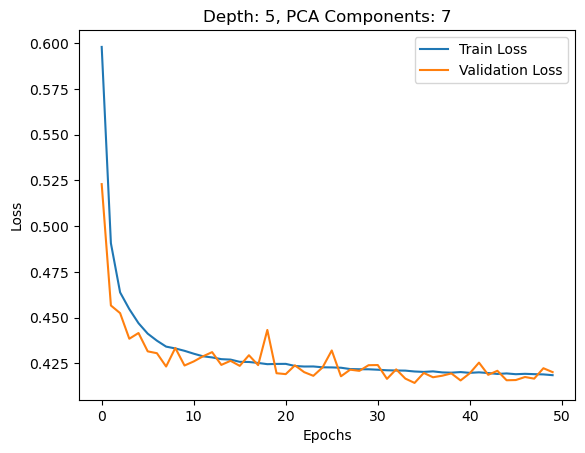

1172/1172 [==============================] - 1s 928us/step


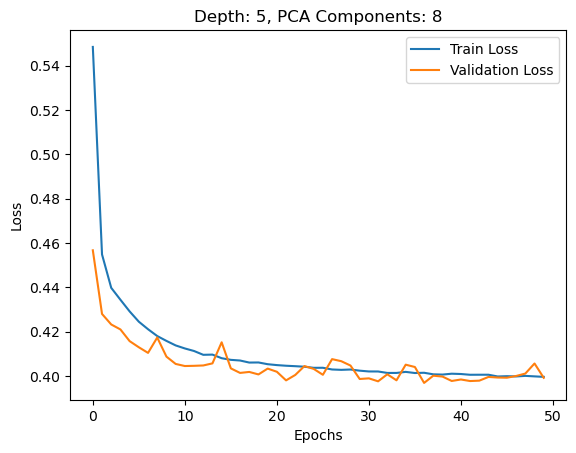

1172/1172 [==============================] - 1s 796us/step


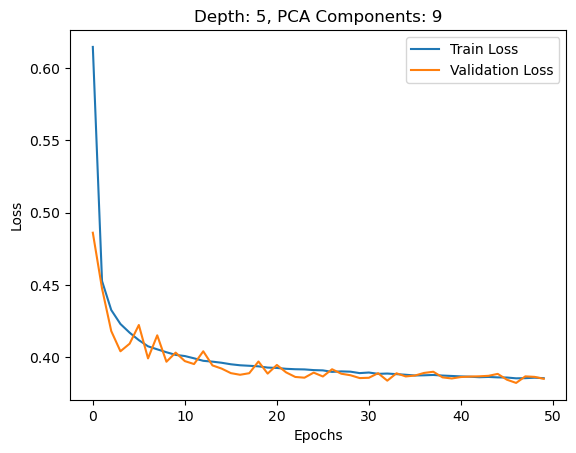

1172/1172 [==============================] - 1s 886us/step


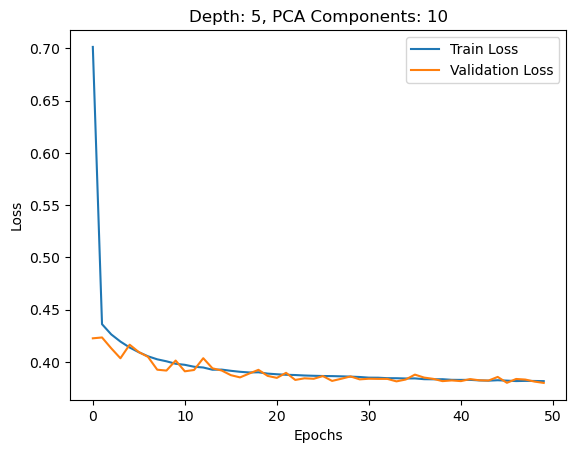

1172/1172 [==============================] - 1s 580us/step


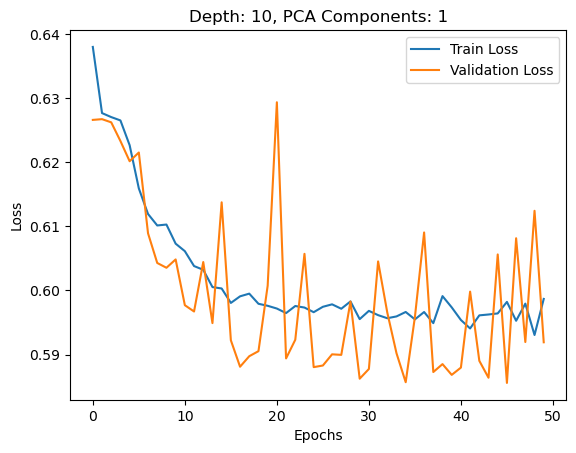

1172/1172 [==============================] - 1s 971us/step


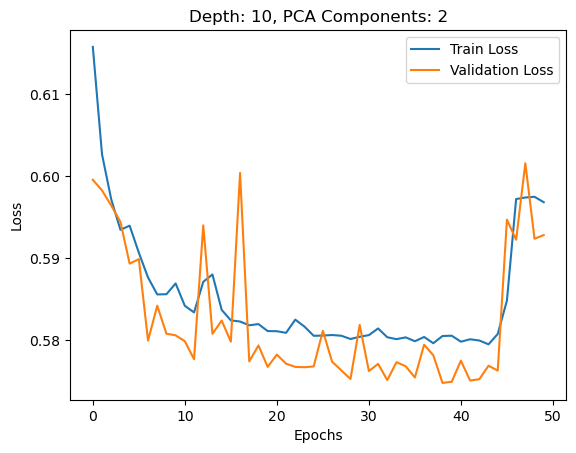

1172/1172 [==============================] - 1s 699us/step


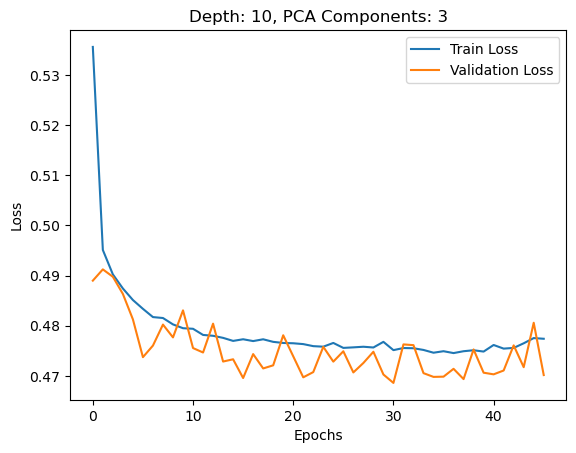

1172/1172 [==============================] - 1s 630us/step


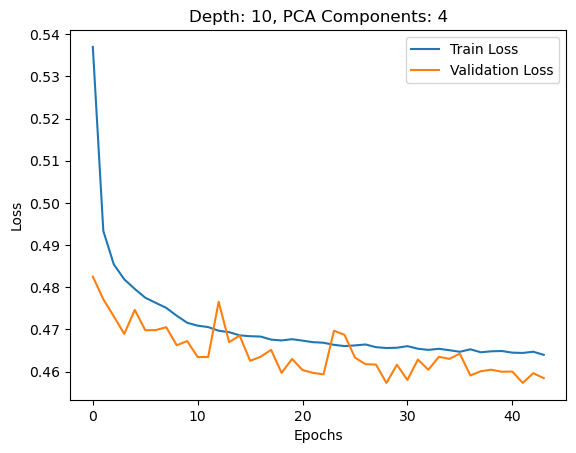

1172/1172 [==============================] - 1s 676us/step


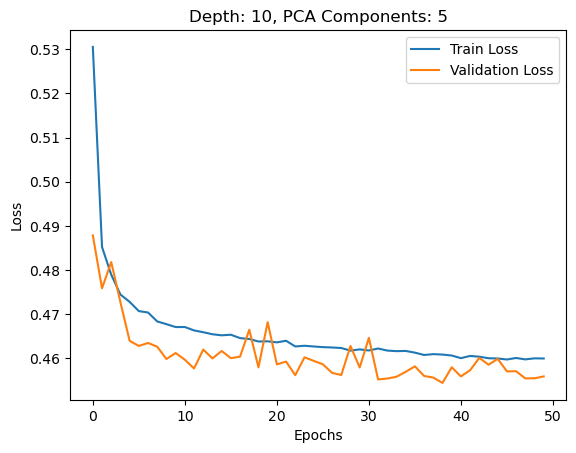

1172/1172 [==============================] - 1s 934us/step


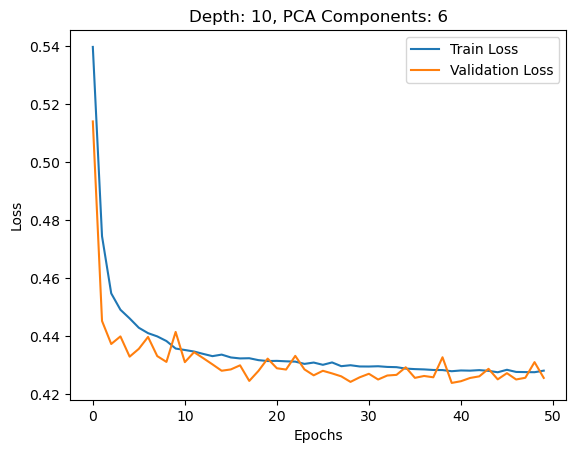

1172/1172 [==============================] - 1s 697us/step


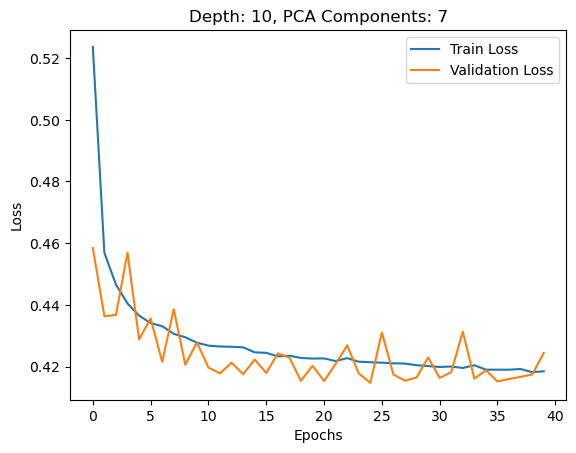

1172/1172 [==============================] - 1s 707us/step


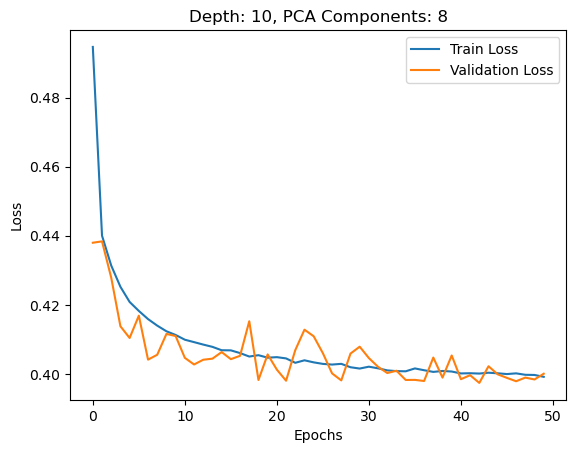

1172/1172 [==============================] - 1s 837us/step


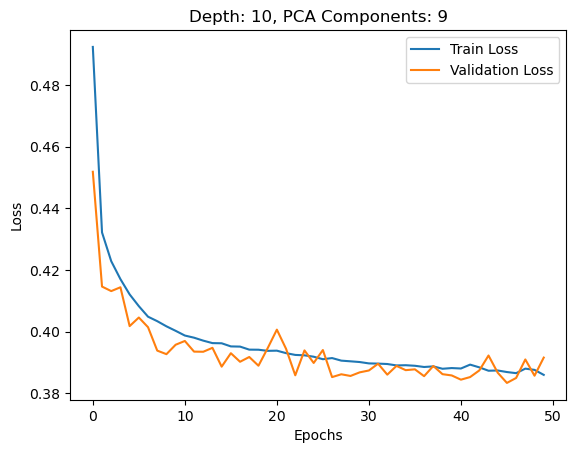

1172/1172 [==============================] - 1s 786us/step


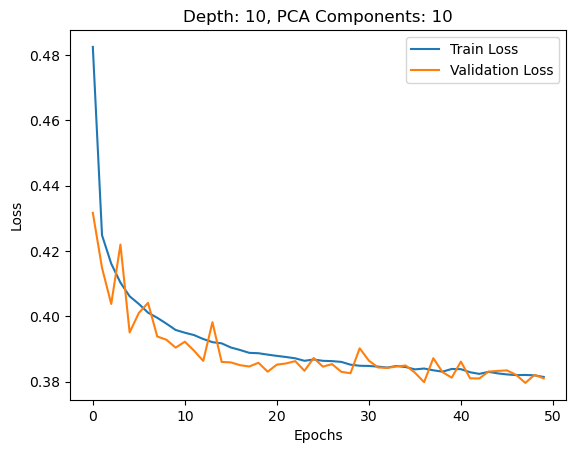

1172/1172 [==============================] - 1s 813us/step


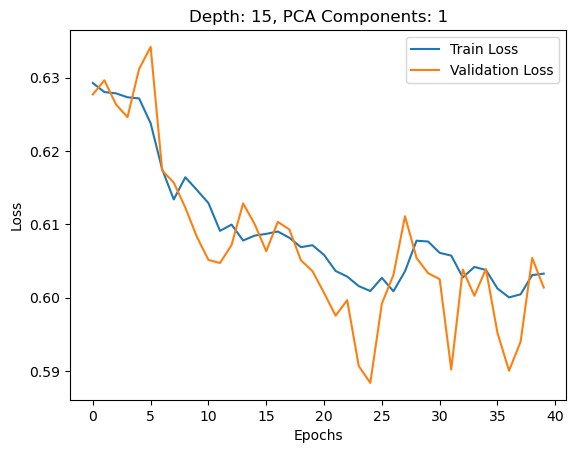

1172/1172 [==============================] - 1s 878us/step


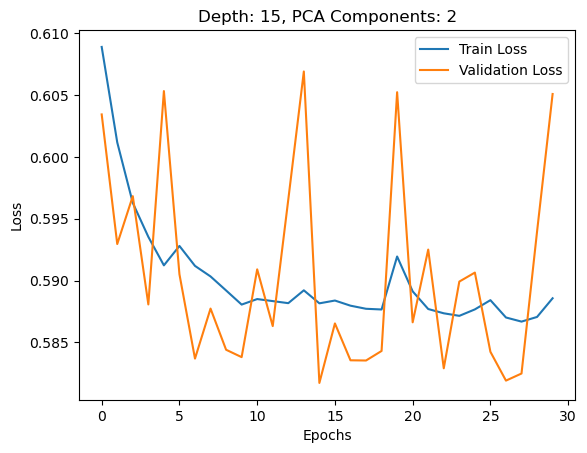

1172/1172 [==============================] - 1s 867us/step


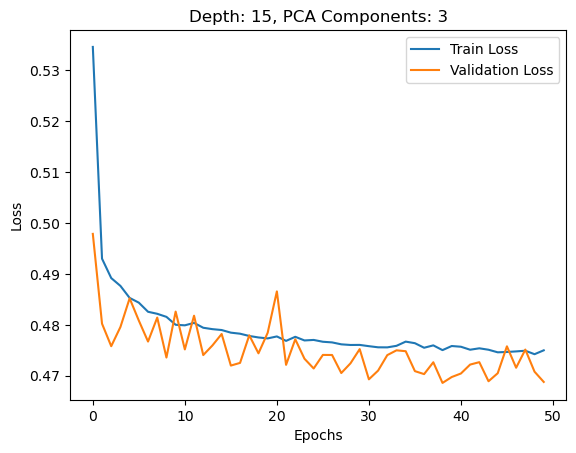

1172/1172 [==============================] - 1s 682us/step


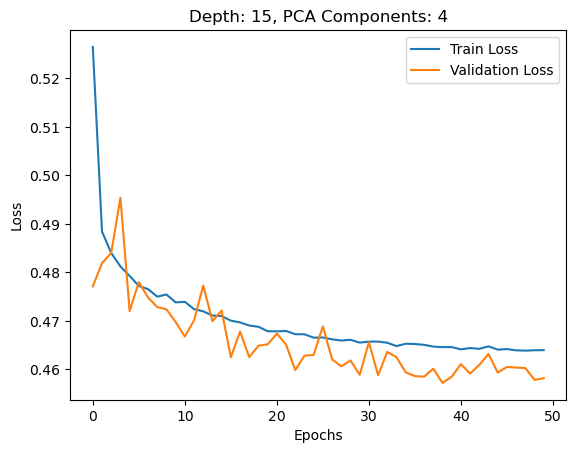

1172/1172 [==============================] - 1s 645us/step


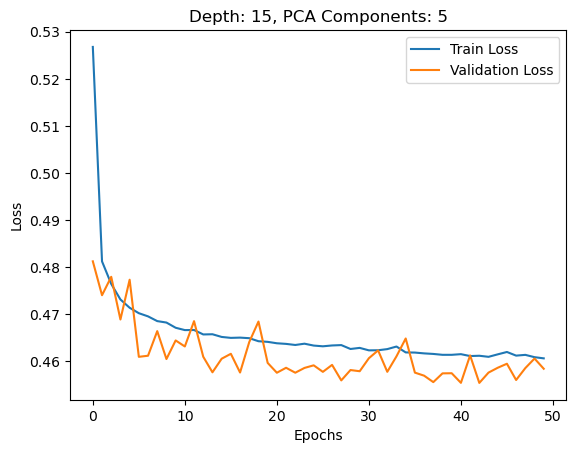

1172/1172 [==============================] - 2s 2ms/step


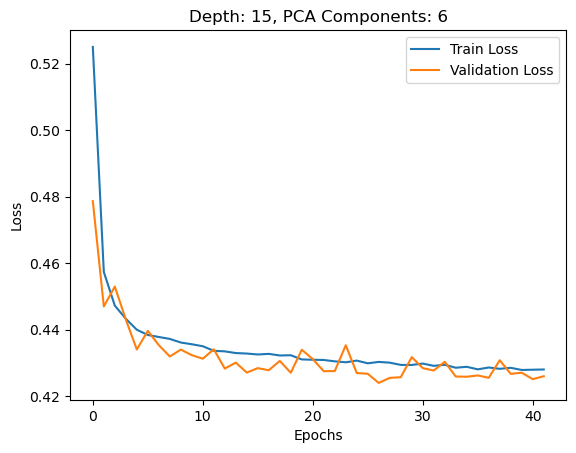

1172/1172 [==============================] - 1s 844us/step


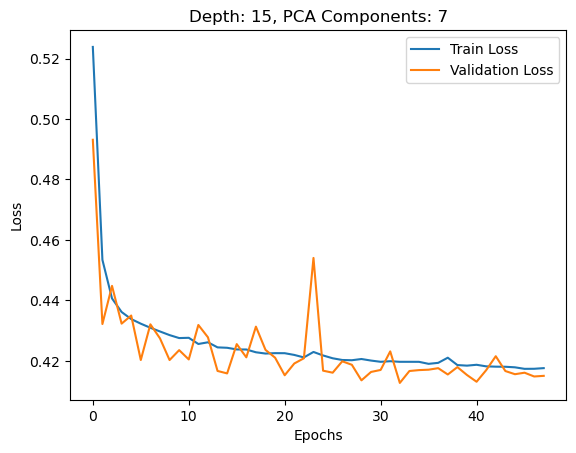

1172/1172 [==============================] - 2s 1ms/step


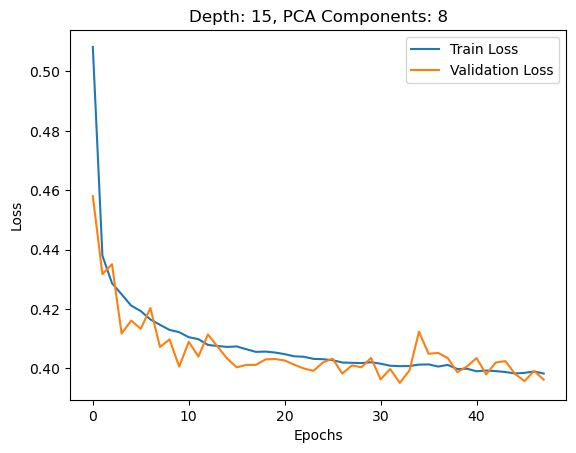

1172/1172 [==============================] - 2s 2ms/step


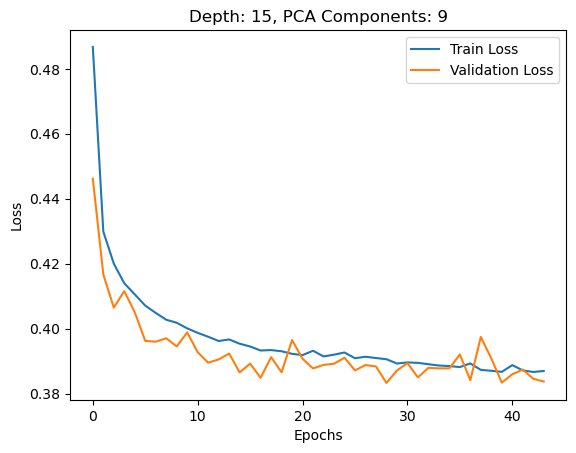

1172/1172 [==============================] - 1s 1ms/step


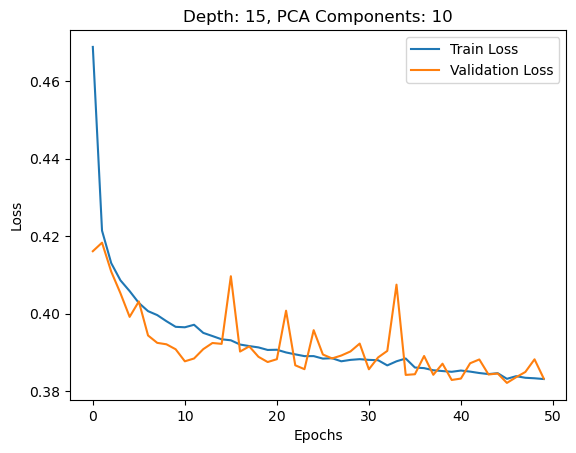

1172/1172 [==============================] - 1s 941us/step
    Depth  F1-Score  PCA Components
0       5  0.045275               1
1       5  0.229160               2
2       5  0.611722               3
3       5  0.618426               4
4       5  0.629906               5
5       5  0.679759               6
6       5  0.693523               7
7       5  0.718088               8
8       5  0.719823               9
9       5  0.728277              10
10     10  0.275607               1
11     10  0.278338               2
12     10  0.620769               3
13     10  0.615426               4
14     10  0.623586               5
15     10  0.684219               6
16     10  0.698535               7
17     10  0.718921               8
18     10  0.722700               9
19     10  0.719274              10
20     15  0.215307               1
21     15  0.336864               2
22     15  0.617875               3
23     15  0.644477               4
24     15  0.612997               5
25   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras import models, layers

# Assuming X_normalized and y are defined
X_normalized = X

# Constants
DEPTH_VALUES = [5, 10, 15]
PCA_COMPONENTS = range(1, 11)
RANDOM_SEED = 42

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)

# Perform PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Define and train the neural network with early stopping
def build_and_train_nn(depth, X_train, y_train, X_val, y_val):
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    for _ in range(depth):
        model.add(layers.Dense(32, activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=0, callbacks=[early_stopping])
    
    return model, history

results = []

for depth in DEPTH_VALUES:
    for n_components in PCA_COMPONENTS:
        pca_subset_X_train = X_train_pca[:, :n_components]
        pca_subset_X_val = X_val_pca[:, :n_components]
        
        model, history = build_and_train_nn(depth, pca_subset_X_train, y_train, pca_subset_X_val, y_val)
        
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f"Depth: {depth}, PCA Components: {n_components}")
        plt.legend()
        plt.savefig(f'training_plot_{depth}_{n_components}_boson_PCA.png')
        plt.show()
        
        y_pred = (model.predict(X_test_pca[:, :n_components]) > 0.5).astype(int)
        f1 = f1_score(y_test, y_pred)
        
        results.append((depth, f1, n_components))

# Display results as a table
results_df = pd.DataFrame(results, columns=['Depth', 'F1-Score', 'PCA Components'])
print(results_df)


In [3]:
results_df

,Depth,F1-Score,PCA Components
0,5,0.045275,1
1,5,0.229160,2
2,5,0.611722,3
3,5,0.618426,4
4,5,0.629906,5
5,5,0.679759,6
6,5,0.693523,7
7,5,0.718088,8
8,5,0.719823,9
9,5,0.728277,10


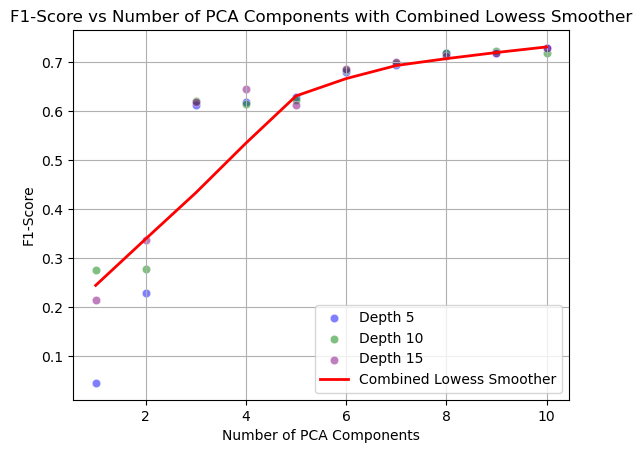

In [6]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Create the scatter plot
plt.figure()
depths = [5, 10, 15]
# Loop over different depths and assign a unique color
depth_colors = ['blue', 'green', 'purple']  # Add more colors if needed
for i, depth in enumerate(depths):
    depth_df = results_df[results_df['Depth'] == depth]
    sns.scatterplot(x='PCA Components', y='F1-Score', data=depth_df,
                    label=f'Depth {depth}', color=depth_colors[i], alpha=0.5)

# Compute the lowess smoother for all depths combined
combined_lowess = sm.nonparametric.lowess(results_df['F1-Score'], results_df['PCA Components'])
combined_lowess_x, combined_lowess_y = combined_lowess.T

# Plot the lowess smoother
plt.plot(combined_lowess_x, combined_lowess_y, color='red', label='Combined Lowess Smoother', linewidth=2)

plt.xlabel('Number of PCA Components')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Number of PCA Components with Combined Lowess Smoother')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("f1_score_vs_num_pca_components_boson.png")

# Show the plot
plt.show()


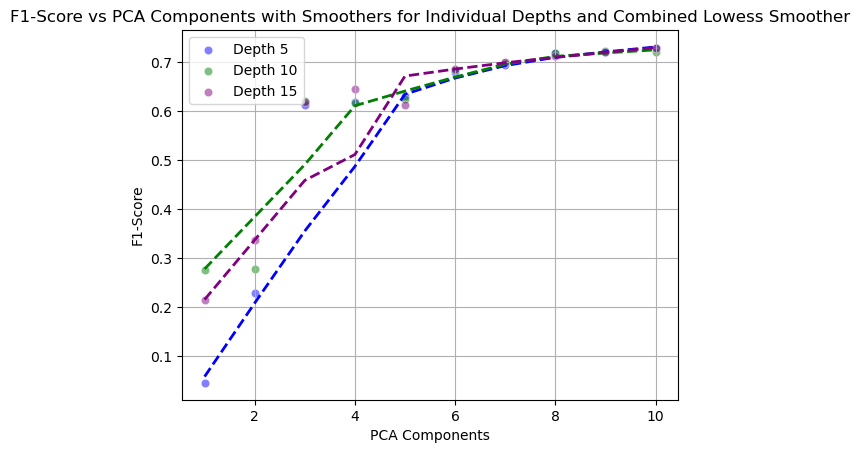

In [7]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Create the scatter plot
plt.figure()

# Loop over different depths and assign a unique color
depth_colors = ['blue', 'green', 'purple']  # Add more colors if needed
for i, depth in enumerate(depths):
    depth_df = results_df[results_df['Depth'] == depth]
    
    # Fit a lowess smoother to the scatter data
    lowess_smooth = sm.nonparametric.lowess(depth_df['F1-Score'], depth_df['PCA Components'])
    lowess_x, lowess_y = lowess_smooth.T
    
    sns.scatterplot(x='PCA Components', y='F1-Score', data=depth_df,
                    label=f'Depth {depth}', color=depth_colors[i], alpha=0.5)
    
    # Plot the lowess smoother
    plt.plot(lowess_x, lowess_y, color=depth_colors[i], linestyle='--', linewidth=2)

# Compute the combined lowess smoother for all depths combined
combined_lowess = sm.nonparametric.lowess(results_df['F1-Score'], results_df['PCA Components'])
combined_lowess_x, combined_lowess_y = combined_lowess.T

# Plot the combined lowess smoother
#plt.plot(combined_lowess_x, combined_lowess_y, color='red', label='Combined Lowess Smoother', linewidth=2)

plt.xlabel('PCA Components')
plt.ylabel('F1-Score')
plt.title('F1-Score vs PCA Components with Smoothers for Individual Depths and Combined Lowess Smoother')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("f1_score_vs_pca_components_boson_split.png")

# Show the plot
plt.show()


In [9]:
# Calculate Pearson correlation coefficient and p-value for the entire dataset
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(depth_df['F1-Score'], depth_df['PCA Components'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.8327562499209124
P-value: 0.002782569855901414
